In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression

import warnings
warnings.filterwarnings('ignore')

## 1、正则化线性回归

### 1.1 导入数据并可视化

In [32]:
datafile = 'ex5data1.mat'
mat = scipy.io.loadmat( datafile )

x, y = mat['X'], mat['y'] # Training set: x.shape=(12, 1), y.shape=(12, 1)
xval, yval = mat['Xval'], mat['yval'] # Cross validation set
xtest, ytest = mat['Xtest'], mat['ytest'] # Test set

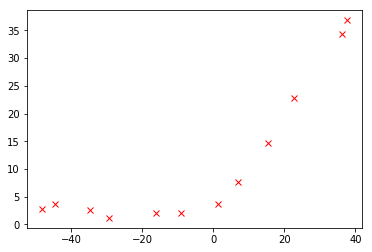

In [33]:
plt.plot(x, y, 'rx')

### 1.2 正则化线性回归并求解

In [34]:
def h(theta, x):                 # h.shape=(m,1) # theta.shape=(n,1)    # x.shape=(m, n)
    theta = theta.reshape(-1,1)
    return np.dot(x, theta)

In [115]:
def j(theta, x, y, lamb=0):
    theta = theta.reshape(-1,1)
    left = np.sum((h(theta, x) - y)**2)
    right = lamb * np.sum(theta[1:]**2)
    return 1/(2*m) * (left + right)

In [116]:
def gradient(theta, x, y, lamb=0):
    theta = theta.reshape(-1,1)
    grad = 1/m * np.dot(x.T, h(theta, x)-y)
    grad[1: ] = grad[1: ] + lamb/m * theta[1: ] 
    return grad.reshape(-1)

In [117]:
def theta_solve(theta, x, y, lamb=0):
    retult = scipy.optimize.fmin_tnc(func=j, x0=theta, args=(x, y, lamb), fprime=gradient)     # gradient与theta均为(n,)，不能为(n,1)
    return retult

In [118]:
m = x.shape[0]
X = np.insert(x, 0, 1, 1)
theta = np.zeros(2)

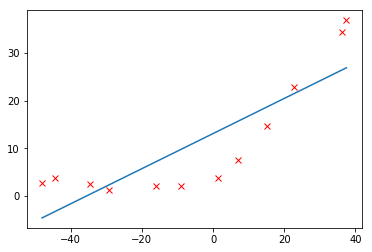

In [119]:
result = theta_solve(theta, X, y, lamb)

theta = result[0]

a = np.array([np.min(x), np.max(x)])
b = theta[0] + theta[1] * a

plt.plot(x, y, 'rx')
plt.plot(a, b)

## 2、学习曲线

In [120]:
x_curve = np.array(np.arange(1,13)) # (12, )

In [121]:
error_train = []
error_cross = []
for i in range(1, 13):
    m = X[:i].shape[0]
    theta = np.zeros(2)
    result = theta_solve(theta, X[:i], y[:i], 0)
    theta = result[0]
    
    error_train.append(j(theta, X[:i], y[:i], 0))
    
    error_cross.append(j(theta,np.insert(xval, 0, 1, 1), yval, 0))

Text(0,0.5,'Error')

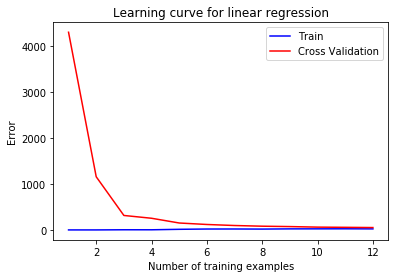

In [122]:
plt.plot(x_curve, error_train, 'b', label='Train')
plt.plot(x_curve, error_cross, 'r', label='Cross Validation')
plt.legend()
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')

## 3、多项式回归

In [123]:
def map_feature(x, n):
    '''将x从一维转换到多维'''
    m = x.shape[0]
    out = np.zeros((m, n+1))
    for i in range(n+1):
        out[:, i] = (x ** i).reshape(-1)
    return out

def normalize_feature(x): # 必须进行归一化处理，不然degree的次数越大，可能出现误差也越大的情况。
    '''归一化多维的x'''
    x[:, 1:] = (x[:, 1:] - x[:, 1:].mean(axis=0))/x[:, 1:].std(axis=0)
    return x  

In [164]:
def theta_solve_degree(degree, lamb=0):
    '''输入degree，输出theta和处理后的x'''
    m = x.shape[0]
    theta = np.zeros(degree+1)

    x_normalized = normalize_feature(map_feature(x, degree))
    result = theta_solve(theta, x_normalized, y, lamb)

    theta = result[0]  # (-1)
    
    return theta

def plot_data_degree(degree):
    '''输入degree，输出拟合结果'''
    theta = theta_solve_degree(degree)
    x_normalized = normalize_feature(map_feature(x, degree))
    plt.plot(x, y, 'x')
    
    a = np.linspace(np.min(x), np.max(x), 50).reshape(-1,1)  # 用新建的x这个画图
    b = h(theta, normalize_feature(map_feature(a, degree)))
    plt.plot(a, b)
    # plt.plot(np.sort(x,axis=0) ,h(theta, x_normalized)[np.argsort(x.reshape(-1),axis=0)]) # 折线图x必须有序，否则会乱。
    plt.title('degree=%d'%degree)

In [159]:
theta_solve_degree(4)

array([11.21758931, 13.14361763, 11.48728397, -0.54242062, -4.97045201])

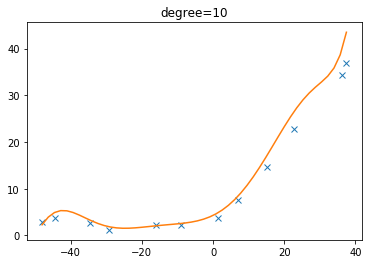

In [165]:
plot_data_degree(10)

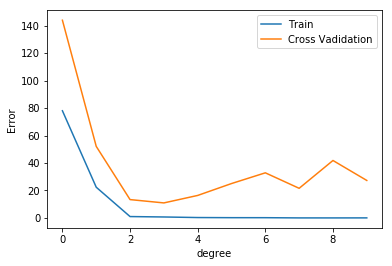

In [135]:
# degree与误差
j_train = []
j_cross = []
lamb = 0
degree = 10
for i in range(10):
    theta = theta_solve_degree(i)
    j_train.append(j(theta, normalize_feature(map_feature(x, i)), y, lamb))
    j_cross.append(j(theta, normalize_feature(map_feature(xval, i)), yval, lamb))

plt.plot(range(degree), j_train, label='Train')
plt.plot(range(degree), j_cross, label='Cross Vadidation')
plt.xlabel('degree')
plt.ylabel('Error')
plt.legend()

## 4、正则化参数

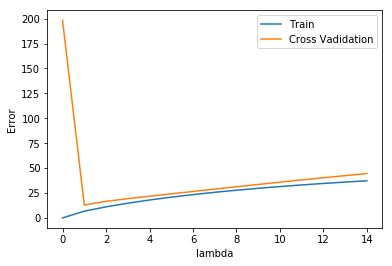

In [141]:
lamb = 15
j_train = []
j_cross = []
for i in range(lamb):
    theta = theta_solve_degree(20, lamb=i)
    j_train.append(j(theta, normalize_feature(map_feature(x, 20)), y, i))
    j_cross.append(j(theta, normalize_feature(map_feature(xval, 20)), yval, i))
    
plt.plot(range(lamb), j_train, label='Train')
plt.plot(range(lamb), j_cross, label='Cross Vadidation')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend()